In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Set hyperparams and toy dataset

In [2]:
input_size = 1
output_size = 1
epochs = 60
learning_rate = 0.001

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Define and train model

In [3]:
# LR model
model = nn.Linear(input_size, output_size)

# Loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train
for epoch in range(epochs):
    # convert to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(
            epoch+1, epochs, loss.item()))

Epoch [5/60], Loss: 10.1582
Epoch [10/60], Loss: 4.2168
Epoch [15/60], Loss: 1.8098
Epoch [20/60], Loss: 0.8347
Epoch [25/60], Loss: 0.4396
Epoch [30/60], Loss: 0.2796
Epoch [35/60], Loss: 0.2148
Epoch [40/60], Loss: 0.1885
Epoch [45/60], Loss: 0.1778
Epoch [50/60], Loss: 0.1735
Epoch [55/60], Loss: 0.1718
Epoch [60/60], Loss: 0.1711


## Plot graph

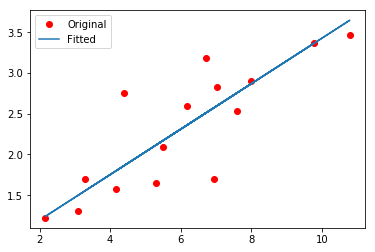

In [6]:
# Returns a new Tensor, detached from the current graph.

predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original')
plt.plot(x_train, predicted, label='Fitted')
plt.legend()
plt.show()

In [7]:
torch.save(model.state_dict(), 'lr_model.ckpt')

In [8]:
!du -sh lr_model.ckpt

4.0K	lr_model.ckpt
